Artificial Neural Network

This dataset is from UCI data set:Combined Cycle Power Plant Data Set
Predicting the Energy Output

Import the libraries

In [1]:
!pip install matplotlib

In [2]:
!pip install seaborn

In [3]:
!pip install xlrd

In [4]:
! pip install scikit-learn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

Load and read the dataset

In [6]:
df = pd.read_excel("Folds5x2_pp.xlsx")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
df.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [8]:
df.sample()

,AT,V,AP,RH,PE
240,24.8,64.63,1020.69,55.74,447.82


<function matplotlib.pyplot.show(close=None, block=None)>

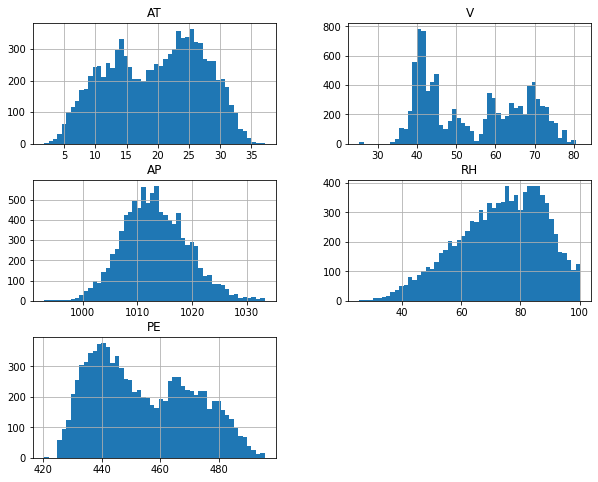

In [9]:
df.hist(bins = 50, figsize=(10, 8))
plt.show

Basic insight of the datase

In [10]:
df.shape

(9568, 5)

In [11]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [12]:
df.columns.values

array(['AT', 'V', 'AP', 'RH', 'PE'], dtype=object)

In [13]:
df.index.values

array([   0,    1,    2, ..., 9565, 9566, 9567], dtype=int64)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


Handling missing data

In [15]:
missing_data = df.isnull()
missing_data

,AT,V,AP,RH,PE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9563,False,False,False,False,False
9564,False,False,False,False,False
9565,False,False,False,False,False
9566,False,False,False,False,False


Let iterate through the missing_data to check missing data per column

In [16]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

AT
False    9568
Name: AT, dtype: int64

V
False    9568
Name: V, dtype: int64

AP
False    9568
Name: AP, dtype: int64

RH
False    9568
Name: RH, dtype: int64

PE
False    9568
Name: PE, dtype: int64



Let check the number of missing data we have

In [17]:
missing_data_count = df.isnull().sum()
missing_data_count

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

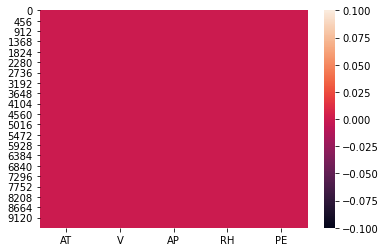

In [18]:
sns.heatmap(df.isnull())
plt.show()

Descriptive Statistic

In [19]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


Let check the correlation between the data set

In [21]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


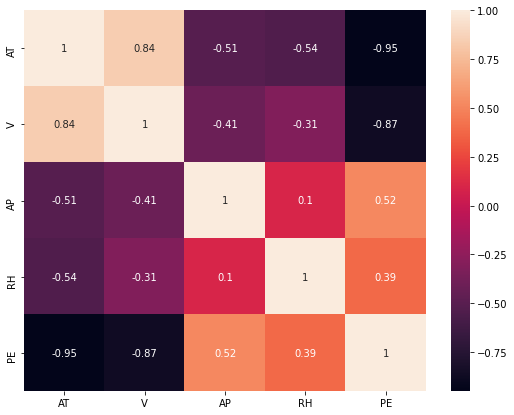

In [22]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(), annot = True)
plt.show()

print the features and target of Artificial Neural Network

In [23]:
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [24]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


Spliting the data set into Training set and Test set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

Building Artificial Neural Network

Initialize the Artificial Neural Network

In [26]:
ann = tf.keras.models.Sequential()

Let Add the Input layer and first hidden layers

In [27]:
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu"))

Let Add the second  hidden layer

In [28]:
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu"))

Let Add the Output layer

In [29]:
ann.add(tf.keras.layers.Dense(units = 1))

Training the Artificial Neural Network

Compiling the  Artificial Neural Network

In [30]:
ann.compile(optimizer = "adam", loss = "mean_squared_error" )

Train the  Artificial Neural Network on the Training set

In [31]:
ann.fit(X_train, y_train, batch_size = 32, epochs= 100)

Train on 7654 samples
Epoch 1/100
7654/7654 [==============================] - 5s 611us/sample - loss: 39810.8525
Epoch 2/100
7654/7654 [==============================] - 1s 72us/sample - loss: 625.9320
Epoch 3/100
7654/7654 [==============================] - 1s 73us/sample - loss: 586.0898
Epoch 4/100
7654/7654 [==============================] - 1s 67us/sample - loss: 538.7213
Epoch 5/100
7654/7654 [==============================] - 1s 66us/sample - loss: 486.5212
Epoch 6/100
7654/7654 [==============================] - 1s 71us/sample - loss: 431.3331
Epoch 7/100
7654/7654 [==============================] - 1s 66us/sample - loss: 375.2283
Epoch 8/100
7654/7654 [==============================] - 1s 77us/sample - loss: 320.1350
Epoch 9/100
7654/7654 [==============================] - 0s 44us/sample - loss: 268.1026
Epoch 10/100
7654/7654 [==============================] - 0s 44us/sample - loss: 219.9503
Epoch 11/100
7654/7654 [==============================] - 0s 59us/sample - loss: 176

### Predicting the Test result

In [32]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[430.04 431.23]
 [461.   460.01]
 [464.46 461.14]
 ...
 [471.73 473.26]
 [438.58 438.  ]
 [457.76 463.28]]
